**This is sample code for plotting an Evidence Gap Map for the python egm package**

For more details refer https://github.com/mb7419/egm



In [2]:
# Install egm package
import pandas as pd
from egm import evidencegapmap
import numpy as np

In [3]:
plot_sample_egm = pd.DataFrame(columns=['doc_id','title','publish_year','doi','abstract','region','x','y','xy_column','relevance', 'researchdesign'])
#plot_sample_egm = pd.DataFrame(columns=["Disgust","Anxiety","Anger","Fear","Pity","Sympathy","Compassion","Hatred","Envy","Happiness","Loss","Grief","Sorrow","Jealousy","Bereavement"])
plot_sample_egm = pd.read_csv('final_coded_emotion_agency.csv')
#plot_sample_egm
#plot_sample_egm = pd.read_csv('emotion_egm.csv')

Define two lists for the X and Y Bins

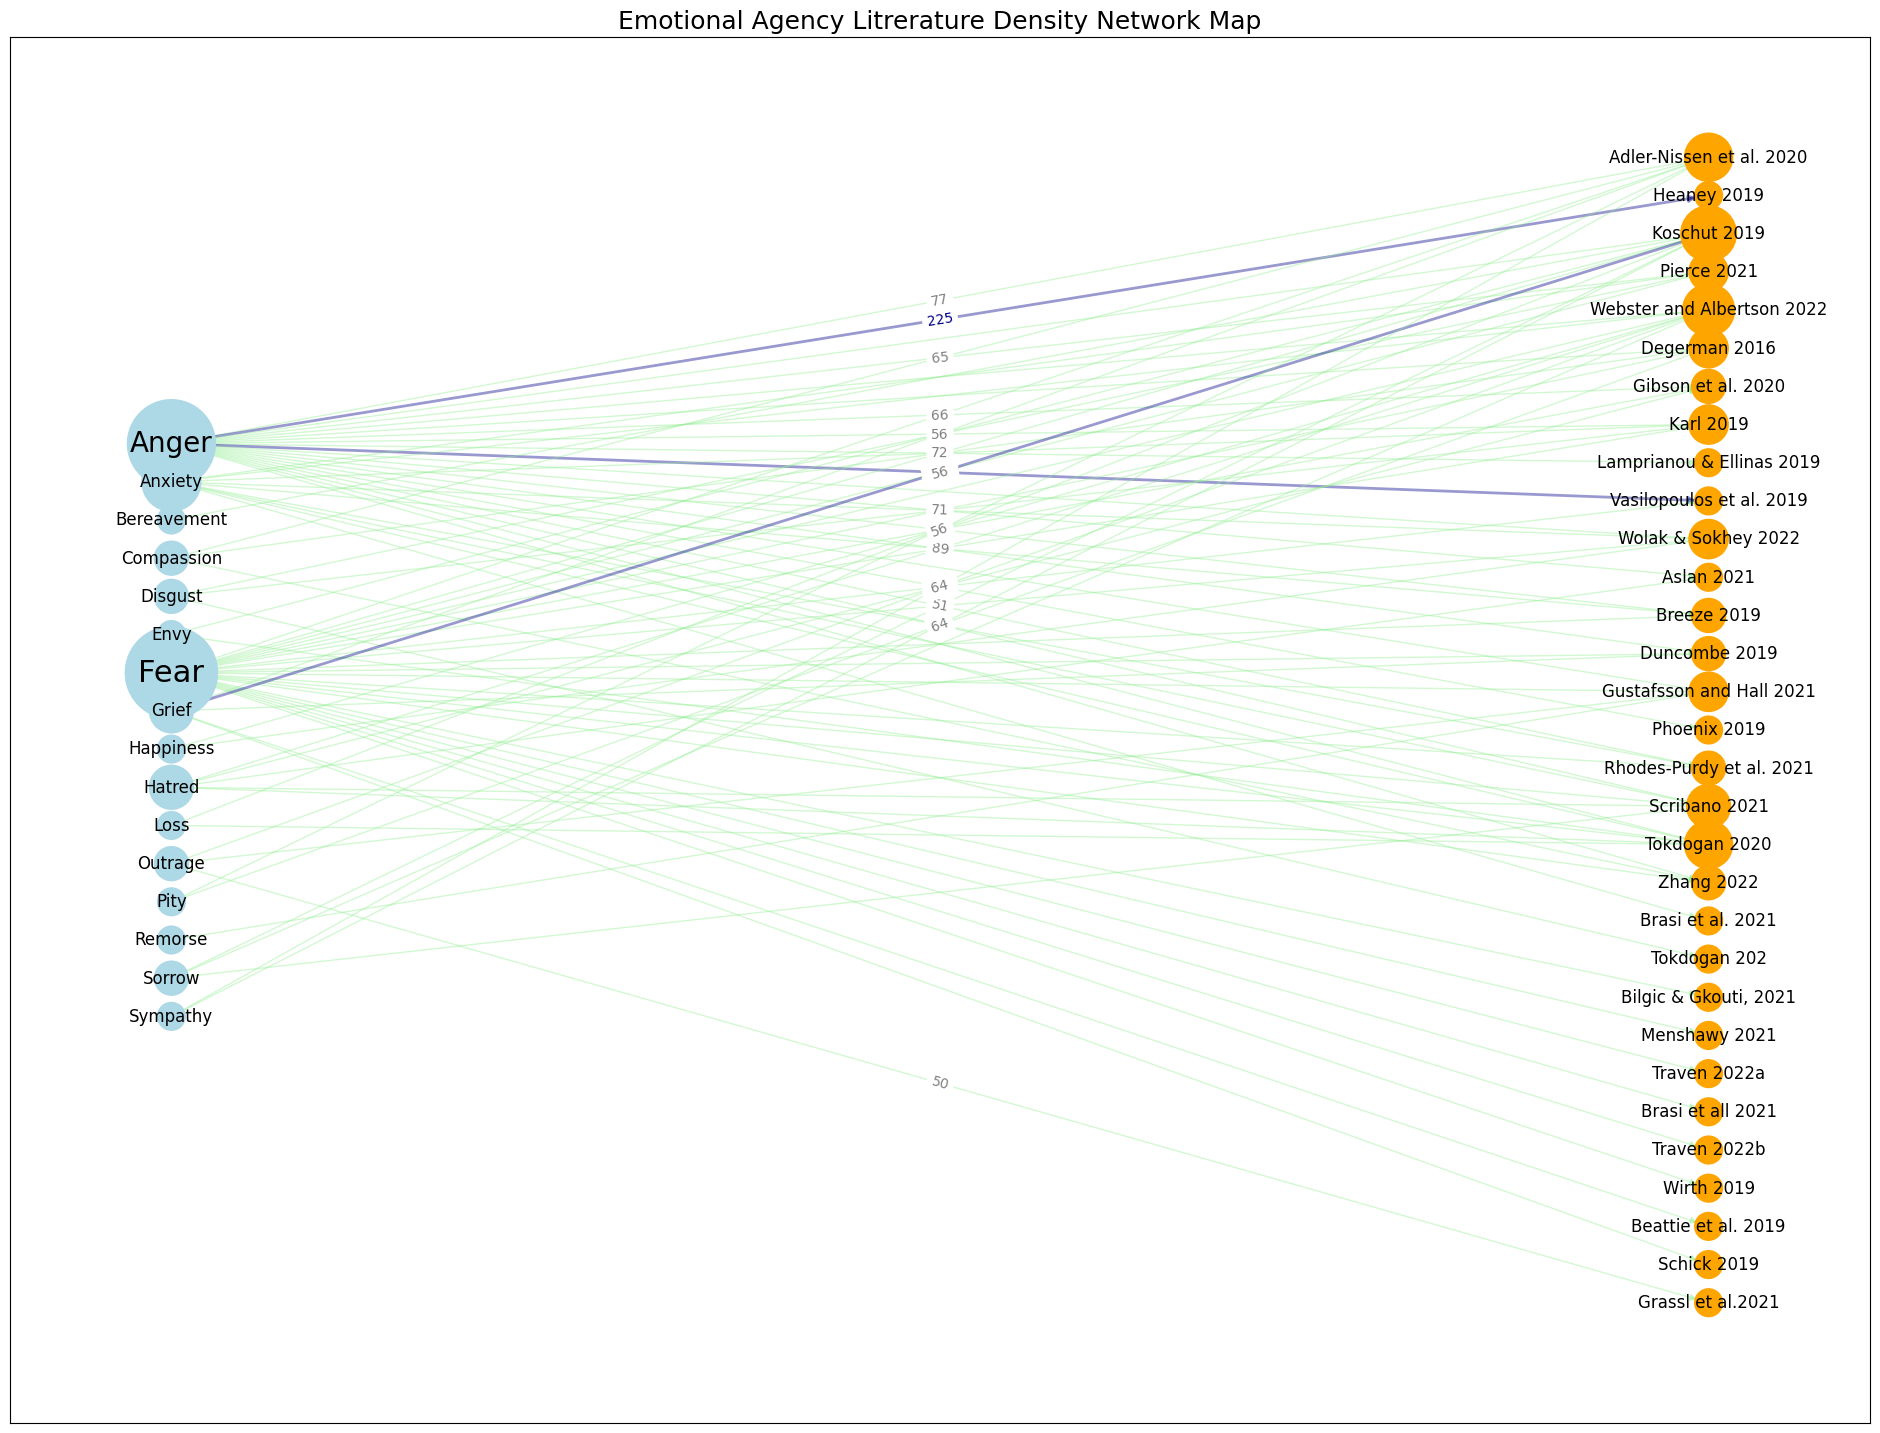

In [4]:
from __future__ import division
from plotly.offline import init_notebook_mode, iplot

#iplot(figure)
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import networkx as nx
from matplotlib.lines import Line2D


# if you're in a jupyter notebook
%matplotlib inline

#Useful linearspaces to give values to the parameters w and b

data = pd.DataFrame({'emotion':plot_sample_egm['emotion'], 
                     'theme':plot_sample_egm['theme'], 
                     'effect_size':plot_sample_egm['effect_size'], 
                     'paper':plot_sample_egm['paper'], 
                     'size':plot_sample_egm['size'],})
#display(data)
e = plot_sample_egm['emotion']
t = plot_sample_egm['theme']
c = plot_sample_egm['size']
sz = plot_sample_egm['effect_size']
p = plot_sample_egm['paper']

G1 = nx.from_pandas_edgelist(data, 'emotion', 'theme')
G2 = nx.from_pandas_edgelist(data, 'emotion', 'paper')
weights = list(data['size'])

######################################################################
G3 = nx.DiGraph()
j = 0
for n in e:
    G3.add_edge(e[j], p[j], weight=sz[j])
    j += 1
weights = nx.get_edge_attributes(G3, 'weight')
#display(widths)  
#for w in widths:
#    display(w)  
def minimum(a, b):
    if a <= b:
        return b
    else:
        return a
def maximum(a, b):
    if a <= b:
        return a
    else:
        return b
######################################################################
G = G3;
nodes = G.nodes()
                       
color_map = []
for node in G:
    if len(node.split()) >= 2:
        color_map.append('orange')
    else: 
        color_map.append('lightblue')  

ecolor_map = []
ewidth_map = []
for edge in G.edges(data='weight'):
    if edge[2] >= 120:
        ecolor_map.append('darkblue')
        ewidth_map.append(2)
    else: 
        ecolor_map.append('lightgreen')  
        ewidth_map.append(1)

fig, ax = plt.subplots(figsize=(24,18))
# Add title to the Heat map
title = "Emotional Agency Literature Review Network Map"
# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer
# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer", align="vertical")

#pos = nx.spiral_layout(G)#, weight='weight')

d = dict(G.degree)
nx.draw_networkx_nodes(G, node_color=color_map, 
        node_size=[minimum(d[k]*200, 400) for k in d],
        pos=pos)

nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color=ecolor_map, width=ewidth_map)#, connectionstyle="arc3,rad=0.1", arrows=True)
from matplotlib.pyplot import text
for node, (x, y) in pos.items():
   text(x, y, node, fontsize= minimum( d[node], 12), ha='center', va='center')

nx.draw_networkx_edge_labels(G,pos, 
                            edge_labels ={(n1,n2):weights[n1,n2] for (n1,n2) in weights if weights[n1,n2] >=120}, font_color='darkblue')
nx.draw_networkx_edge_labels(G,pos, 
                            edge_labels ={(n1,n2):weights[n1,n2] for (n1,n2) in weights if weights[n1,n2] <120 and weights[n1,n2] >= 50}, font_color='gray')

#######################

###########################
plt.savefig('paper_final_coded_network_graph_emotion_agency.png')
plt.show()
